<a href="https://colab.research.google.com/github/hyeonjh/machine-learning-python/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
기울기 :  [[0.63482159]]
절편  [0.12628453]
 결정계수 :  0.1064571423759525


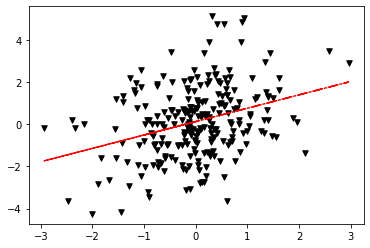

In [35]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive/')

# 데이터 읽기
h_stock = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine_learning/Regression/H_stock.csv')
s_stock = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine_learning/Regression/S_stock.csv')
k_index = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine_learning/Regression/K_index.csv')

h_stock.head()
# s_stock.head()
# k_index.head()

#헤더정보를 제거
h_rate = np.array(h_stock.h_rate[1:]) # 0번째 인덱스의 nan값 제거 
s_rate = np.array(s_stock.s_rate[1:]) 
# print(s_stock.s_rate[1:])
k_rate = np.array(k_index.k_rate[1:])
# print(k_rate)

#선형 회귀모델 함수에 넣기 위해 reshape로 차원 조정  (ex : (248, ) -> (248,1))
h_rate = h_rate.reshape(h_rate.shape[0],1)
# print(h_rate) 
s_rate = s_rate.reshape(s_rate.shape[0],1)
# print(s_rate)
k_rate = k_rate.reshape(k_rate.shape[0],1)

#산포도
plt.scatter(k_rate,h_rate,c='black', s=30 , marker= 'v', label = 'train')

# 모델 적용 
model = linear_model.LinearRegression()
model.fit(k_rate, h_rate)

#line  -회귀식 적용 
plt.plot(k_rate, model.predict(k_rate), linestyle = '-.' , label = 'h stock ', c = 'red')

print('기울기 : ' , model.coef_)
print( '절편 ', model.intercept_)
print( ' 결정계수 : ', model.score(k_rate,h_rate))


기울기 :  [[1.00132771]]
절편  [-0.03500143]
 결정계수 :  0.061579713608051145


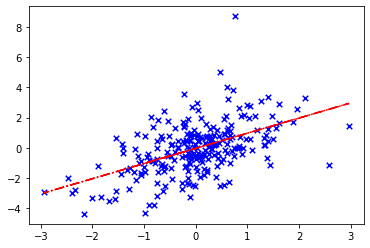

In [42]:
#scatter 산포도 
plt.scatter(k_rate ,s_rate , c='blue', s=30 , marker='x', label = 's rate ')

#model 
model = linear_model.LinearRegression()
model.fit(k_rate, s_rate)

#line
plt.plot(k_rate, model.predict(k_rate), linestyle = '-.', label = 'h stock ', c= 'red')

print('기울기 : ' , model.coef_)
print( '절편 ', model.intercept_)
print( ' 결정계수 : ', model.score(k_rate,h_rate))

    

기울기 :  [[1.0190195  0.08202488]]
절편  [-0.99849668]
score  0.4943555166070208


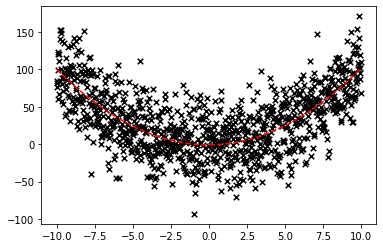

In [58]:
from sklearn import linear_model 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x_train = np.arange( -10 , +10 , 1/50. ).reshape(-1,1)
# print(x_train)
x_train.shape

x_train2 =  x_train ** 2 + np.random.randn(len(x_train),1)*30 
# print( x_train2) # (x,1)형태로 변환 

#scatter
plt.scatter(x_train , x_train2 , c ='black', s=30 , marker= 'x', label='sample')

#회귀 모형에 넣기 위한 트레이닝 데이터 세트 생성 
X2_TRAIN = np.c_[x_train**2 , x_train]
# print(X2_TRAIN)

#모델 제작 및 훈련 
model = linear_model.LinearRegression()
model.fit(X2_TRAIN,x_train2)

#모델을 이용해 예측 - line
plt.plot(x_train , model.predict(X2_TRAIN), linestyle='--', label = 'sample', c ='red')


print('기울기 : ' , model.coef_)
print( '절편 ', model.intercept_)
print('score ' , model.score(X2_TRAIN,  x_train2 ))